<a href="https://colab.research.google.com/github/stepanjaburek/workingpaper_czech_psp_speeches/blob/main/goole_colab_pca_custer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###################################
# PCA and cluster analysis
###############################
# setup
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
dp = pd.read_csv("/content/0_kw_analysis.csv")

###
# define the variables of interest
filenames = dp['filename']
features = dp.drop('filename', axis=1)

Explained variance ratio: [0.14551512 0.08021581 0.05116221 0.0440165  0.04030854]


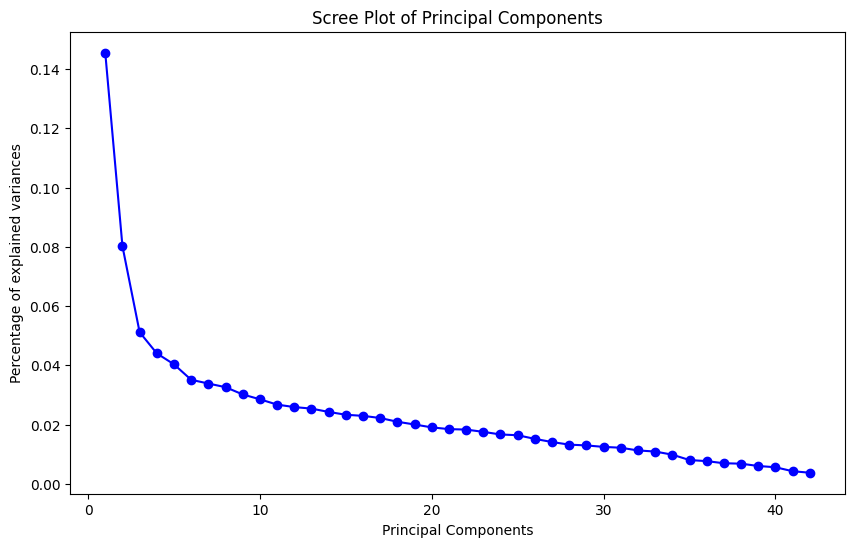

                                     feature    PC   loading
quantum                              quantum   PC1  0.345341
wave function                  wave function   PC1  0.262520
superposition                  superposition   PC1  0.236085
social science                social science   PC1  0.227384
operator                            operator   PC1  0.226986
...                                      ...   ...       ...
quantum                              quantum  PC42  0.820224
wave function                  wave function  PC42 -0.268170
operator                            operator  PC42 -0.266967
uncertainty principle  uncertainty principle  PC42 -0.213275
busemeyer                          busemeyer  PC42 -0.139627

[210 rows x 3 columns]
                                         feature   PC   loading
quantum                                  quantum  PC1  0.345341
wave function                      wave function  PC1  0.262520
superposition                      superposition  PC

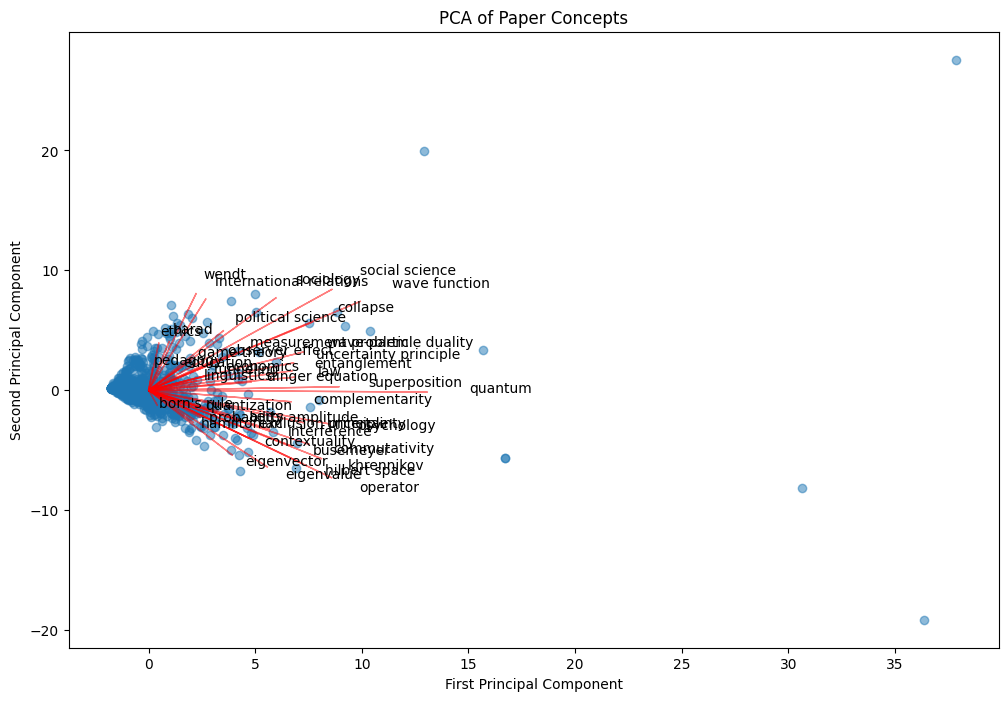

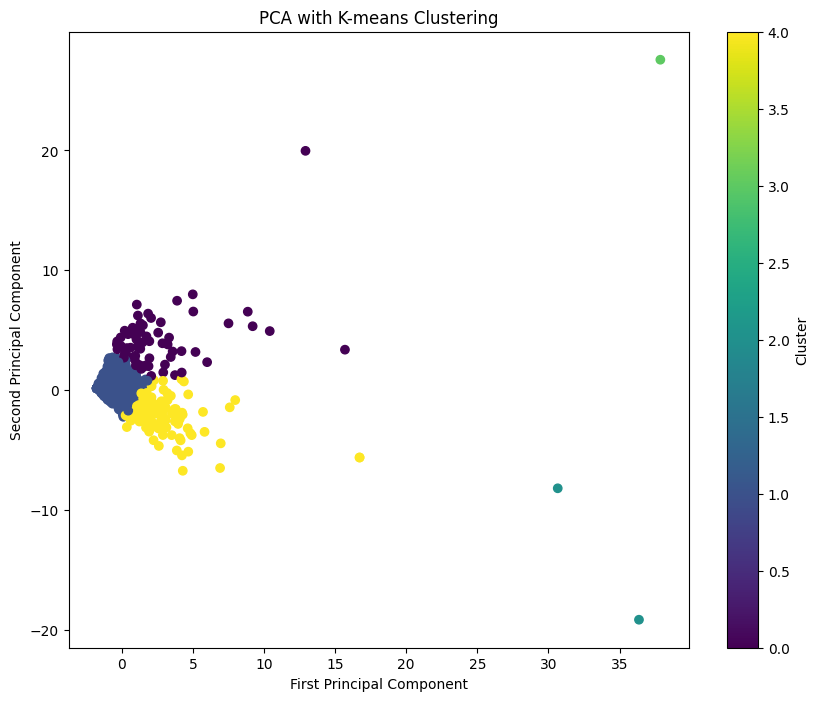

In [ ]:
# Run PCA
pca = PCA()
features_scaled = StandardScaler().fit_transform(features)
pca_result = pca.fit_transform(features_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_[:5])

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of explained variances')
plt.show()

# Feature importance in components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

# top 5 features per component
top_loadings = pd.DataFrame()
for pc in loadings.columns:
    top_5 = pd.DataFrame({
        'feature': loadings.index,
        'PC': pc,
        'loading': loadings[pc]
    })
    # Sort by absolute values manually
    top_5 = top_5.reindex(top_5['loading'].abs().sort_values(ascending=False).index)
    top_5 = top_5.head(5)
    top_loadings = pd.concat([top_loadings, top_5])



print(top_loadings)


# PC1 and 2
pc12_loadings = top_loadings[top_loadings['PC'].isin(['PC1', 'PC2'])]
pc12_loadings = pc12_loadings.sort_values(['PC', 'loading'],
                                         ascending=[True, False])
print(pc12_loadings)

# PCA biplot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

for i, feature in enumerate(features.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*max(abs(pca_result[:, 0])),
              pca.components_[1, i]*max(abs(pca_result[:, 1])),
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(abs(pca_result[:, 0]))*1.15,
             pca.components_[1, i]*max(abs(pca_result[:, 1]))*1.15,
             feature)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Paper Concepts')
plt.show()

###################################
# cluster analysis
np.random.seed(456)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(pca_result[:, :2])

# visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=clusters, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('PCA with K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<Figure size 1000x800 with 0 Axes>

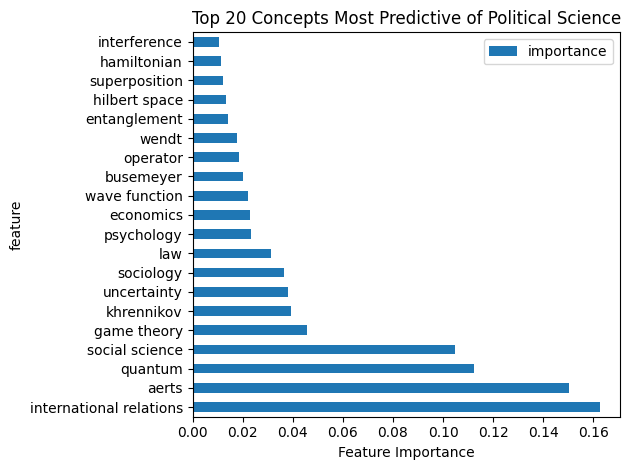

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
target = features['political science']
predictors = features.drop('political science', axis=1)

# Fit random forest
rf = RandomForestRegressor(n_estimators=100, random_state=123)
rf.fit(predictors, target)

# Get feature importance
importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='feature', y='importance')
plt.title('Top 20 Concepts Most Predictive of Political Science')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()